# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 9.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


데이터 살펴보기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/20220421 Toy Project/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

## 데이터 분포 확인하기

### 고가주택(`CAT. MEDV`)에 영향을 미치는 요인

In [ ]:
# 고가 주택 여부 (CAT. MEDV)에 따른 변수 확인

how = {
    "CRIM" : np.mean,
    "ZN" : np.mean,
    "INDUS" : np.mean,
    "CHAS" : np.mean,
    "NOX" : np.mean,
    "RM" : np.mean,
    "AGE" : np.mean,
    "DIS" : np.mean,
    "RAD" : np.mean,
    "TAX" : np.mean,
    "B" : np.mean,
    "LSTAT" : np.mean,
    "MEDV" : np.mean
    }
df.groupby("CAT. MEDV").agg(how)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
CAT. MEDV,,,,,,,,,,,,,
0,4.196212,7.566351,12.256754,0.056872,0.566703,6.083813,70.973697,3.683463,10.317536,428.796209,350.361327,14.148720,19.295261
1,0.686206,30.440476,5.510238,0.130952,0.494368,7.293524,56.523810,4.355598,5.690476,304.952381,388.387857,5.139167,38.797619


>  주택가격이 30,000$이 넘는 고가주택이 되는 요인(`CAT. MEDV`)으로 `CRIM`, `ZN`, `INDUS`, `AGE`, `RAD`, `TAX`, `LSTAT` 를 생각해 볼 수 있음

### 상관관계 확인

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


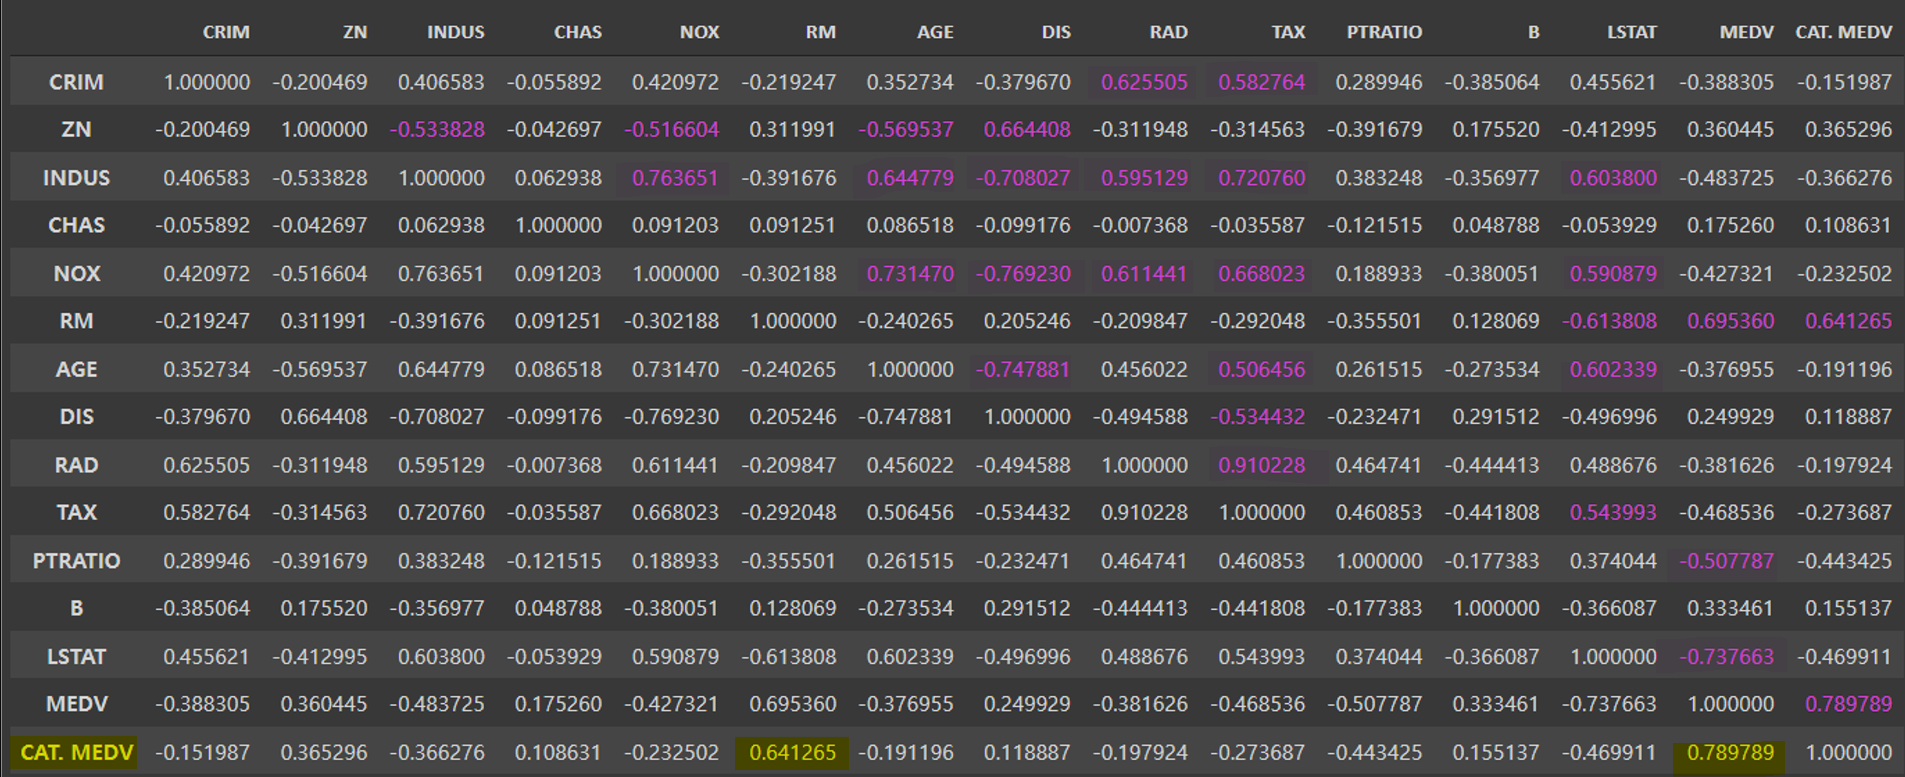




> 위의 상관관계표에서 |상관관계| 값 > 0.5 인 경우만 찾아봤을 때 (분홍색 표시),
> 
> 여기서 `RAD` 와 `TAX` 는 상관관계 값이 '0.910228'로 1에 가까워 '고속도로까지의 접근성 지수'와 '자산세율'이 비례하는 관계라고 예상할 수 있다.
> 
> 또한 아래처럼 `INDUS`와 3가지 요소들에 대해서도 생각해 볼 수 있다.
> 
> - 비소매상업지역 면적비율 `INDUS` 과 일산화질소 농도 `NOX` 의 관계
- 비소매상업지역 면적비율 `INDUS` 과 직업센터까지의 접근성 지수 `DIS` 의 관계
- 비소매상업지역 면적비율 `INDUS` 과 재산세율 `TAX` 의 관계
> 
> 집의 위치가 찰스강 경계에 있는지 아닌지에 대한 요소 `CHAS` 는 다른 요소들에 거의 영향을 미치지 않는 것으로 보인다.

### 주택가격(`MEDV`)에 영향을 미치는 Factor 찾기

> |상관관계| > 0.5 인 경우만 생각해볼 때, 주택가격(`MEDV`)과 방의 수(`RM`), 학생-교사 비율(`PTRATIO`) , 하위 계층 비율(`LSTAT`)이 상관관계가 있는 것으로 나타난다.

#### 방의 수 - 주택가격

In [ ]:
# 주택가격과 방의 수
how = {
    "MEDV" : np.mean }
df.groupby("RM").agg(how)

,MEDV
RM,
3.561,27.50
3.863,23.10
4.138,12.85
4.368,8.80
4.519,7.00
...,...
8.375,50.00
8.398,48.80
8.704,50.00


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

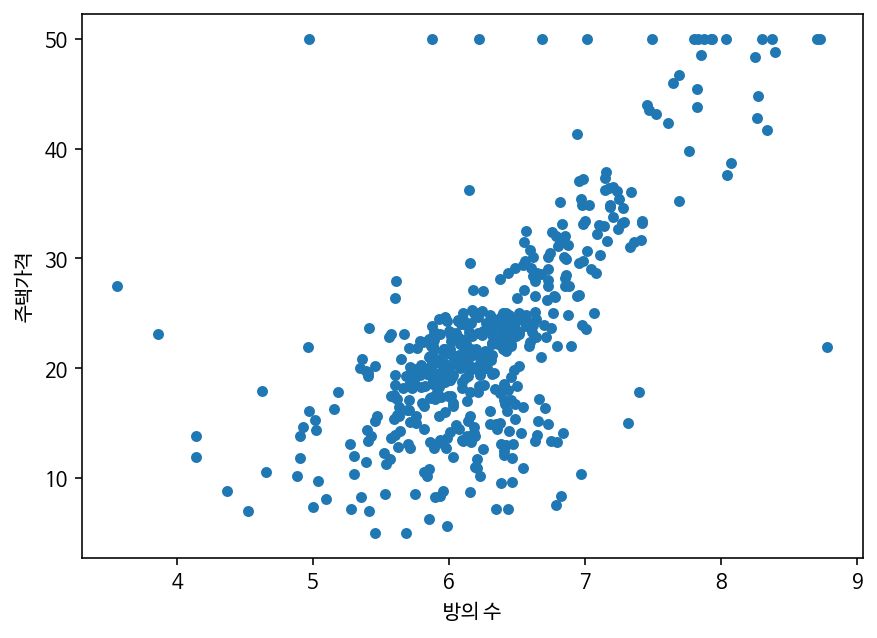

In [ ]:
df.plot.scatter( x='RM', y='MEDV', xlabel="방의 수", ylabel="주택가격", figsize=(7, 5))

> *방이 많을 수록 주택가격이 높은 경향성을 보인다.*



#### 학생:교사 비율 - 주택가격

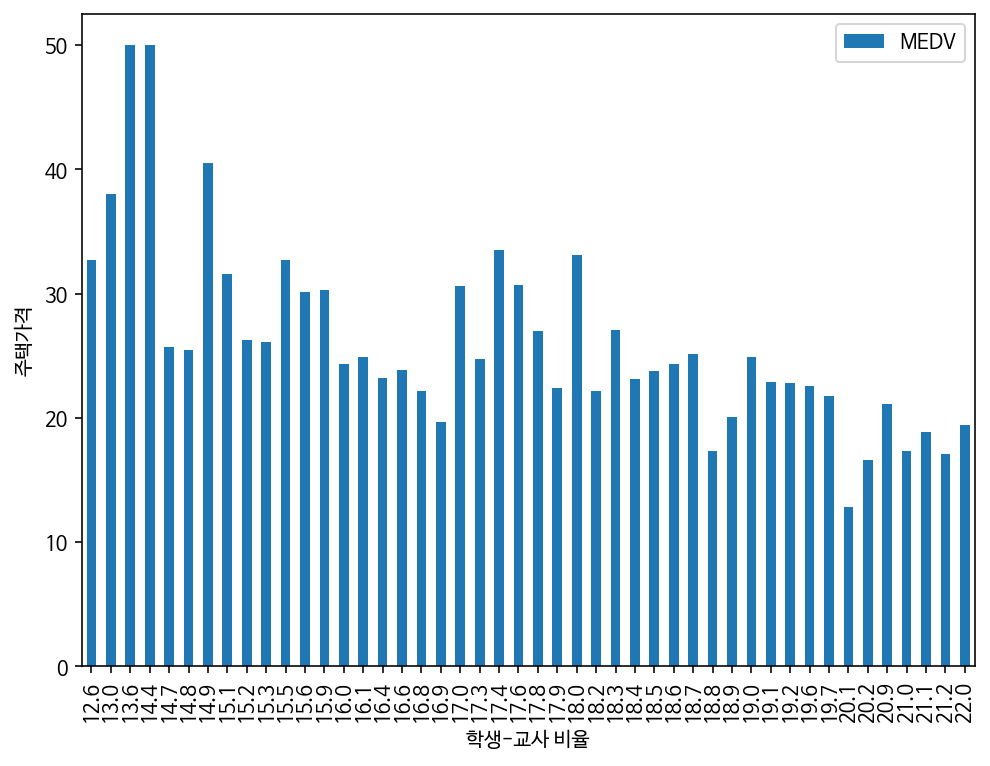

In [ ]:
# 주택가격과 학생교사비율
how = {
    "MEDV" : np.mean }
df.groupby("PTRATIO").agg(how)

p = df.groupby("PTRATIO").agg(how)
p.plot.bar(xlabel="학생-교사 비율", ylabel="주택가격", figsize=(8, 6))

> *학생-교사 비율이 적을 때 주택가격이 높게 나타나는 편이다 (13.6~14.4). 큰 폭으로 차이나지는 않지만 학생-교사 비율이 커질 수록 주택가격 값이 다소 감소하는 것으로 보인다.*


####  하위 계층 비율 - 주택가격

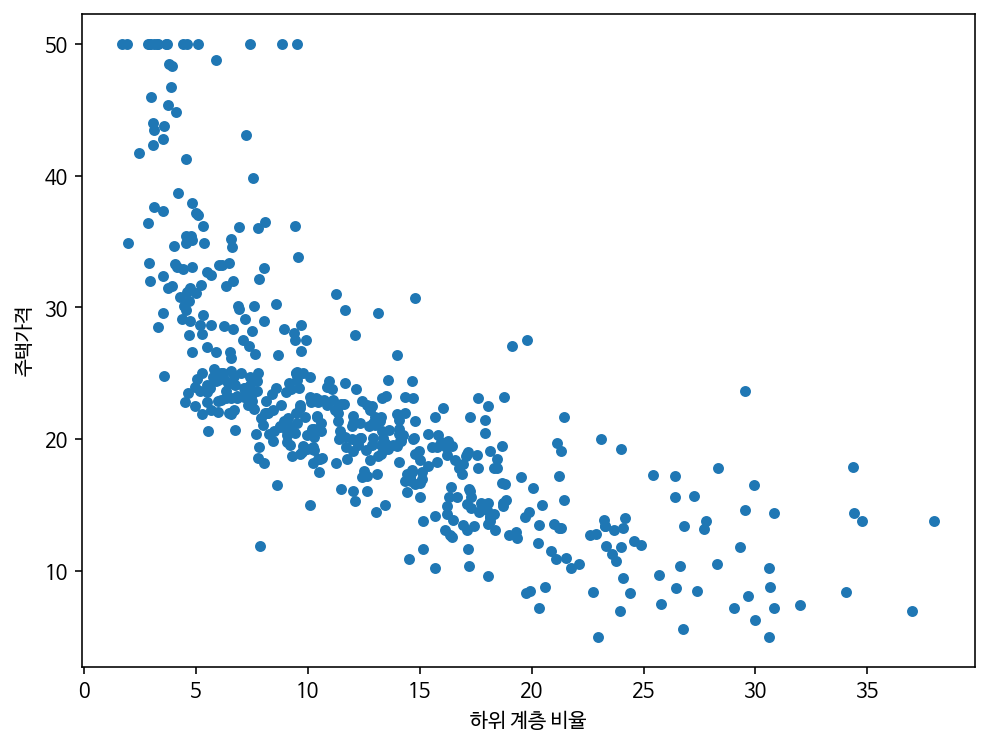

In [ ]:
# 주택가격과 하위계층비율
how = {
    "MEDV" : np.mean }
df.groupby("LSTAT").agg(how)

df.plot.scatter( x='LSTAT', y='MEDV', xlabel="하위 계층 비율", ylabel="주택가격", figsize=(8, 6))

> *하위 계층 사람들이 많을수록 주택가격이 낮아지는 경향성을 보인다.*


주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

 #### 25,000 평방피트를 초과하는 거주지역의 비율 - 주택가격

In [ ]:
# 대형 평수 vs 소형 평수    ZN ↑ (대형 평수 비율↑) 기준으로 본인 소유 주택가격↑ (MEDV↑)
how = {
    "MEDV" : np.mean }
df.groupby("ZN").agg(how)

,MEDV
ZN,
0.0,20.473387
12.5,20.130000
17.5,33.000000
18.0,24.000000
20.0,35.466667
21.0,22.150000
22.0,25.320000
25.0,22.440000
28.0,22.833333


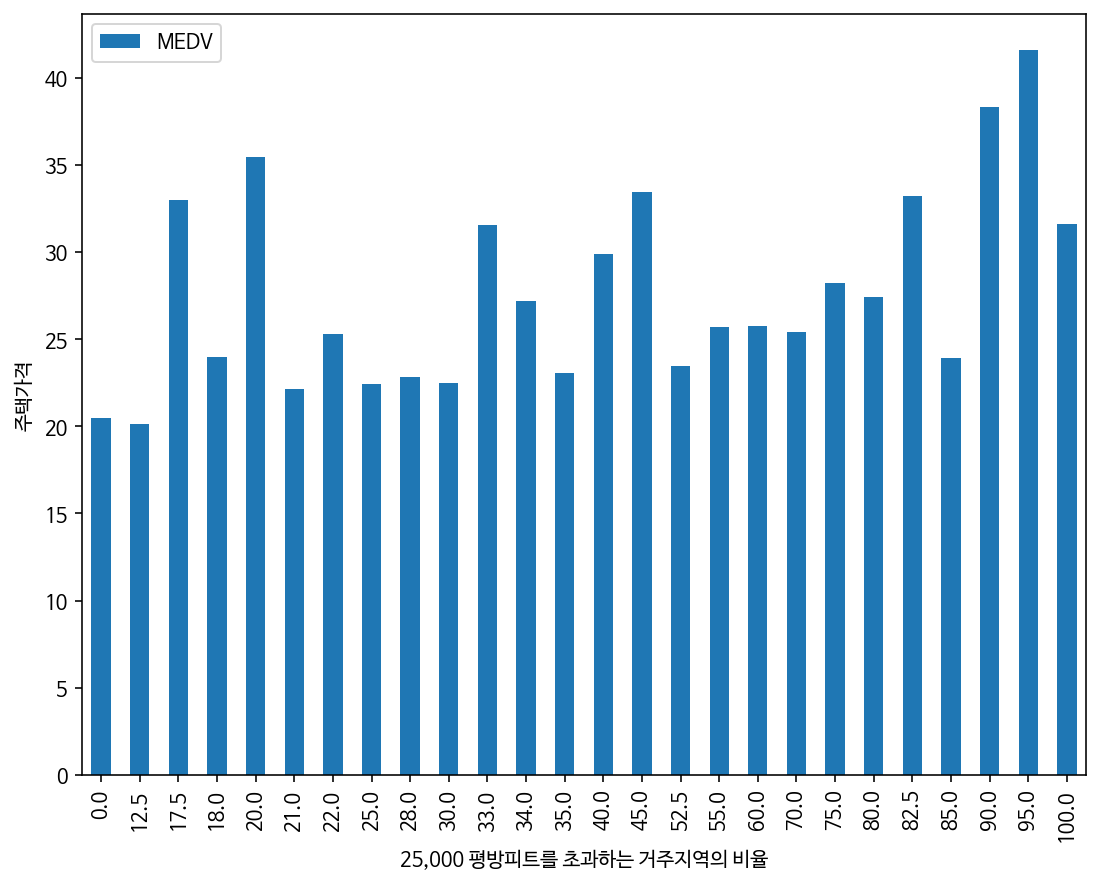

In [ ]:
#df.plot.scatter(x='ZN', y='MEDV', xlabel="평수", ylabel="주택가격", figsize=(9, 7))
a = df.groupby("ZN").agg(how)
a.plot.bar( xlabel="25,000 평방피트를 초과하는 거주지역의 비율", ylabel="주택가격", figsize=(9, 7))

> *25,000 평방피트를 초과하는 거주지역의 비율이 80 이상에서 대체로 주택가격이 높게 나타나지만, 비율이 작은 곳에서도 주택가격이 높은 값을 보이고, 대체로 비슷하여 넓은 평수 거주지역 비율이 주택가격에 접적으로 영향을 끼치는 것으로 보이지 않는다.*



#### 노후화 정도 - 주택가격

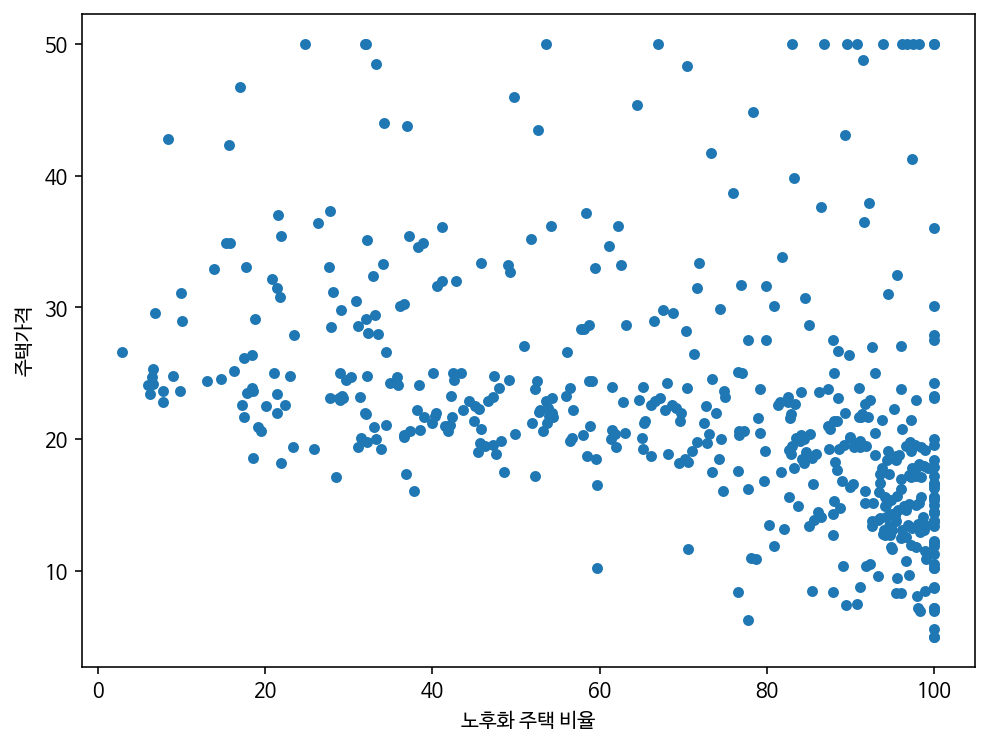

In [ ]:
# 노후화 정도와 집값의 관계는? (AGE & MEDV)  노후될 수록 AGE↑
how = {
    "MEDV" : np.mean }
df.groupby("AGE").agg(how)

df.plot.scatter( x='AGE', y='MEDV', xlabel="노후화 주택 비율", ylabel="주택가격", figsize=(8, 6))

> *노후화된 주택이 많을수록 주택가격이 낮은 경향을 보여준다.*



#### 직장과의 거리 - 주택가격

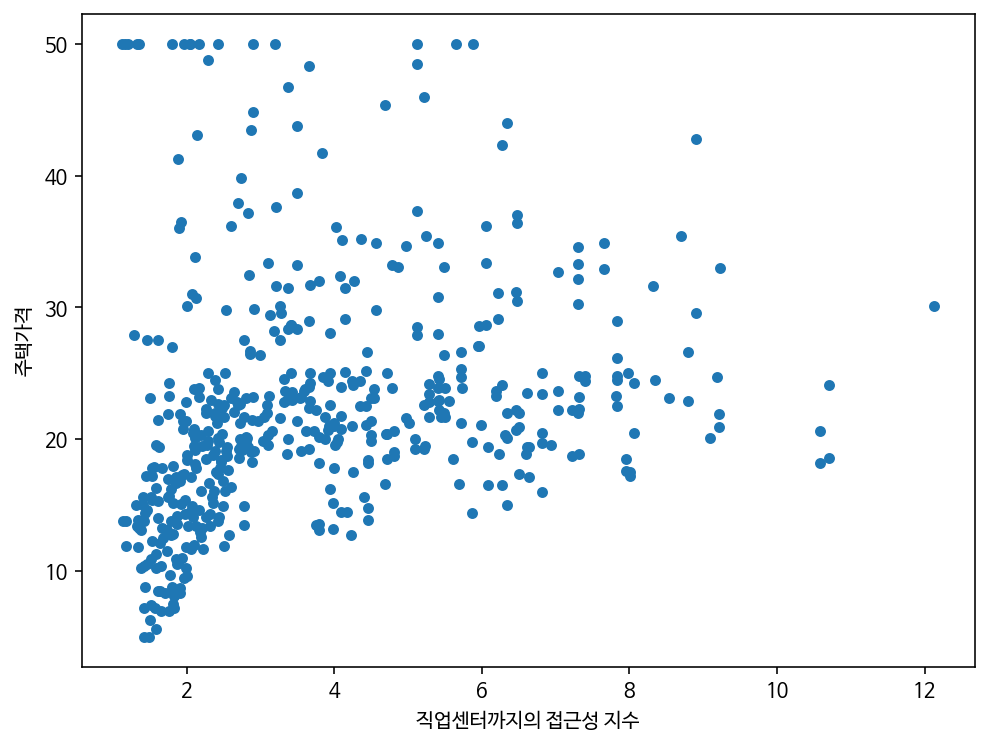

In [ ]:
# 직주근접 : 거리가 가까울 수록 DIS ↓
how = {
    "MEDV" : np.mean }
df.groupby("DIS").agg(how)

df.plot.scatter( x='DIS', y='MEDV', xlabel="직업센터까지의 접근성 지수", ylabel="주택가격", figsize=(8, 6))

> *직업센터까지의 접근성 지수가 낮을 수록 직장거의 거리가 가까운 것이라 할 때, 대부분 거리가 가까운 지역에 점들이 밀집해 있고, 주택가격은 직업센터와 가까울 수록 낮은 경향을 보인다. 접근성 지수가 3이상이면 경향성은 사라지는 것처럼 보인다.*


#### 찰스강 뷰 여부 - 주택가격

In [ ]:
# 찰스강 뷰
how = {
    "MEDV" : np.mean }
df.groupby("CHAS").agg(how)

,MEDV
CHAS,
0,22.093843
1,28.440000


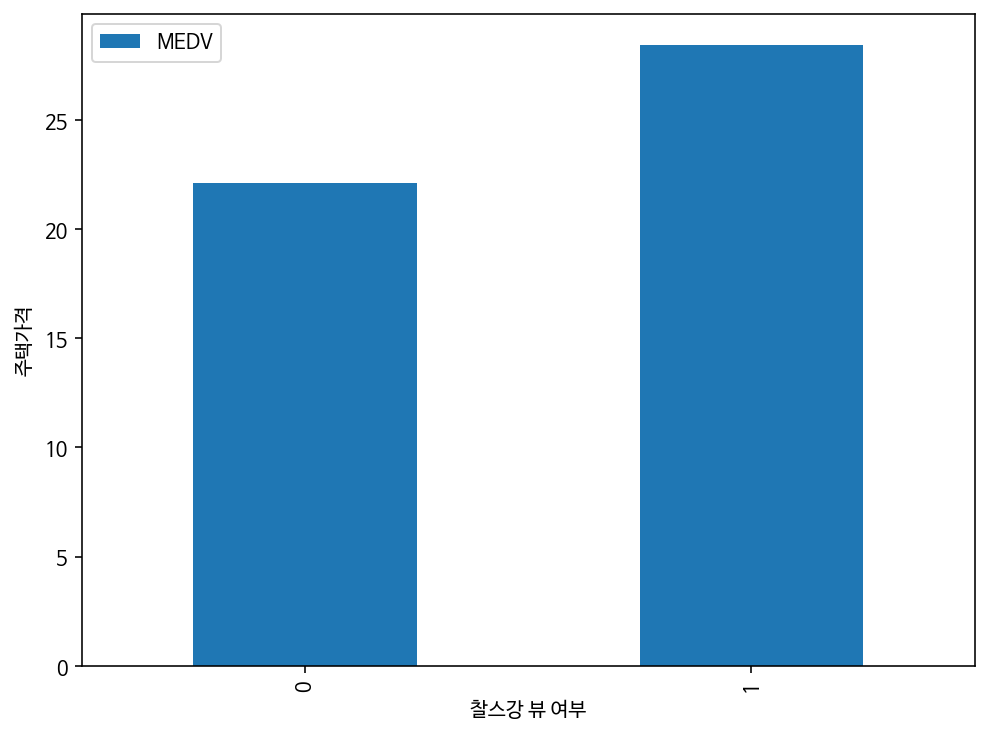

In [ ]:
c = df.groupby("CHAS").agg(how)
c.plot.bar(figsize=(8, 6),  xlabel="찰스강 뷰 여부", ylabel="주택가격")

> *주택이 찰스강 뷰에 있을때 주택가격이 약 6,346$ 더 높은 것으로 나타난다.*


#### 직장과의 거리&평수 - 주택가격

In [ ]:
# 직장이 가까우면서(DIS↓)  소형 평수(ZN↓) 인 부동산의 가격은?

df.groupby(['ZN1','DIS']).agg(how)

MEDV
ZN1 DIS               
대형  5.1167   31.233333
    5.1180   49.250000
    5.4011   32.850000
    5.6484   50.000000
    5.8850   50.000000
...                ...
일반  7.0379   32.700000
    7.3073   22.000000
    7.3172   23.433333
    8.7921   24.750000
    10.7103  21.350000

[414 rows x 1 columns]

In [ ]:
def ZN(x):
    if x <= 30:
        return "소형"
    elif x <= 60:
        return "중형"
    else:
        return "대형"
    
df['ZN1'] = df['ZN'].map(ZN)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,ZN1,DIS1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,소형,적당
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,소형,적당
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,소형,적당
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,소형,먼곳
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,소형,먼곳


In [ ]:
df['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [ ]:
df['DIS'].unique()

array([ 4.09  ,  4.9671,  6.0622,  5.5605,  5.9505,  6.0821,  6.5921,
        6.3467,  6.2267,  5.4509,  4.7075,  4.4619,  4.4986,  4.2579,
        3.7965,  3.7979,  4.0123,  3.9769,  4.0952,  4.3996,  4.4546,
        4.682 ,  4.4534,  4.4547,  4.239 ,  4.233 ,  4.175 ,  3.99  ,
        3.7872,  3.7598,  3.3603,  3.3779,  3.9342,  3.8473,  5.4011,
        5.7209,  5.1004,  5.6894,  5.87  ,  6.0877,  6.8147,  7.3197,
        8.6966,  9.1876,  8.3248,  7.8148,  6.932 ,  7.2254,  6.8185,
        7.2255,  7.9809,  9.2229,  6.6115,  6.498 ,  5.2873,  4.2515,
        4.5026,  4.0522,  4.0905,  5.0141,  5.4007,  4.7794,  4.4377,
        4.4272,  3.7476,  3.4217,  3.4145,  3.0923,  3.0921,  3.6659,
        3.615 ,  3.4952,  2.7778,  2.8561,  2.7147,  2.421 ,  2.1069,
        2.211 ,  2.1224,  2.4329,  2.5451,  2.6775,  2.3534,  2.548 ,
        2.2565,  2.4631,  2.7301,  2.7474,  2.4775,  2.7592,  2.2577,
        2.1974,  2.0869,  1.9444,  2.0063,  1.9929,  1.7572,  1.7883,
        1.8125,  1.9

In [ ]:
def DIS(x):
    if x <= 2.5:
        return "가까움"
    elif x <= 5:
        return "적당"
    else:
        return "먼곳"
    
df['DIS1'] = df['DIS'].map(DIS)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,ZN1,DIS1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,소형,적당
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,소형,적당
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,소형,적당
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,소형,먼곳
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,소형,먼곳


In [ ]:
df.groupby(['ZN1','DIS1']).agg(how)

MEDV
ZN1 DIS1           
대형  먼곳    30.734286
소형  가까움   18.601064
    먼곳    23.067089
    적당    23.798830
중형  먼곳    26.400000
    적당    31.883333

In [ ]:
zd = df.groupby(['ZN1','DIS1']).agg(how)

In [ ]:
zd.sort_values('ZN1', ascending=True)

MEDV
ZN1 DIS1           
대형  먼곳    30.734286
소형  가까움   18.601064
    먼곳    23.067089
    적당    23.798830
중형  먼곳    26.400000
    적당    31.883333

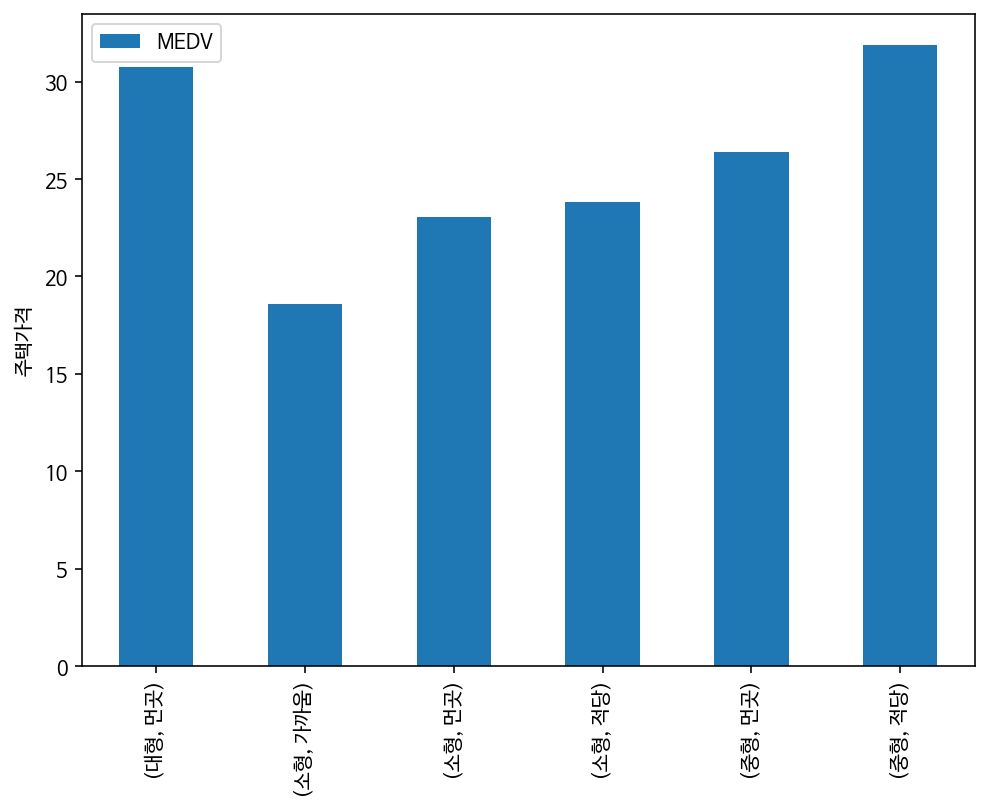

In [ ]:
zd.plot.bar(figsize=(8, 6),  xlabel="", ylabel="주택가격")

> *소형 평수이면 주택가격이 더 낮은 것으로 나타났다. 소형 평수 내에서 직장과의 거리가 가까운 곳의 주택가격이 가장 저렴하고, 거리가 먼 곳, 적당한 곳 순으로 주택가격이 증가한다. *


#### 고가주택 여부에 관한 요인

##### 비소매상업지역 면적 비율



In [ ]:
how = {
    "INDUS" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,INDUS
CAT. MEDV,
0,12.256754
1,5.510238


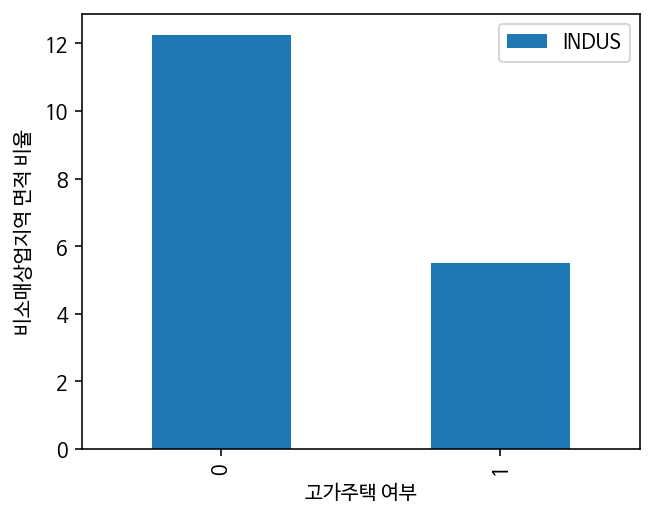

In [ ]:
k = df.groupby("CAT. MEDV").agg(how)
k.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="비소매상업지역 면적 비율")

##### 재산세율


In [ ]:
how = {
    "TAX" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,TAX
CAT. MEDV,
0,428.796209
1,304.952381


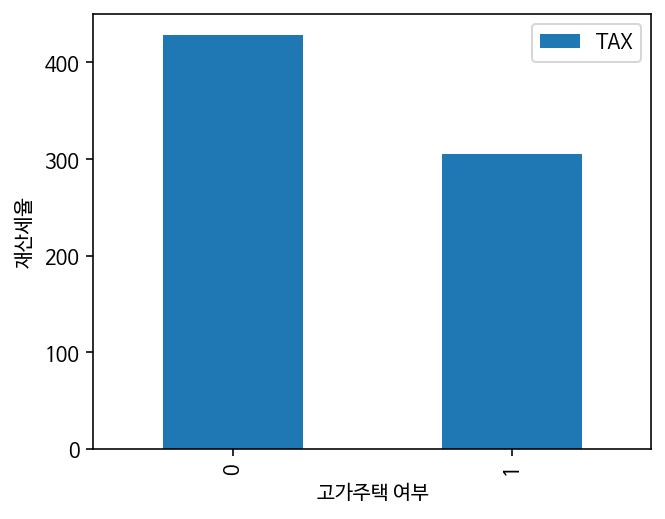

In [ ]:
k1 = df.groupby("CAT. MEDV").agg(how)
k1.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="재산세율")

##### 고속도로 접근성 지수


In [ ]:
how = {
    "RAD" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,RAD
CAT. MEDV,
0,10.317536
1,5.690476


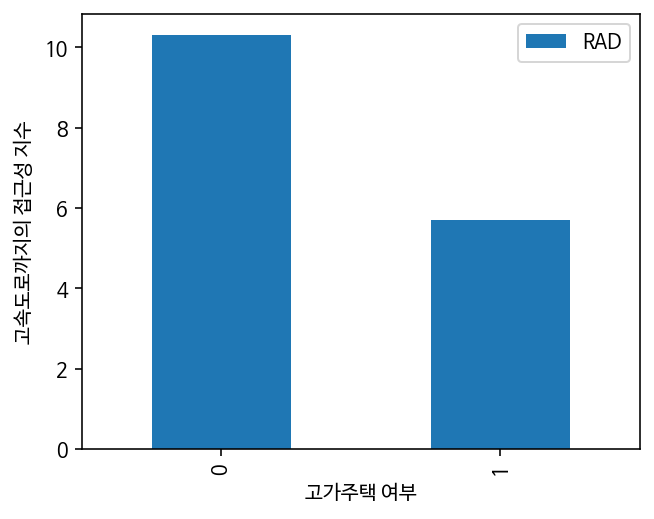

In [ ]:
k2 = df.groupby("CAT. MEDV").agg(how)
k2.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="고속도로까지의 접근성 지수")

### 결론

주택가격에 직접적으로 영향을 끼치는 것으로 보이는 Factor는 `'방의 개수'`와` '하위 계층 비율'`로 보여진다. 

* 방의 수가 많을 수록
* 하위 계층 비율이 적을 수록
* 노후화 주택이 적은 곳
* 학생-교사 비율이 적은 곳
* 가급적 넓은 평수
* 직장과의 거리는 적당하거나 먼 곳
* 이왕이면 찰스강 뷰

일 수록 **주택가격이 높게** 나타난다고 볼 수 있다.



또한, **`고가주택의 공통적인 특징`**은 아래와 같다.
* 비소매상업지역의 면적이 적음
* 재산세가 적음
* 고속도로에서 상대적으로 떨어져 있음

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>

# 추가 작업

In [ ]:
how = {
    "RAD" : np.mean }
df.groupby("CAT. MEDV").agg(how)

k2 = df.groupby("CAT. MEDV").agg(how)
k2.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="고속도로까지의 접근성 지수")

##### CRIM


In [165]:
how = {
    "CRIM" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,CRIM
CAT. MEDV,
0,4.196212
1,0.686206


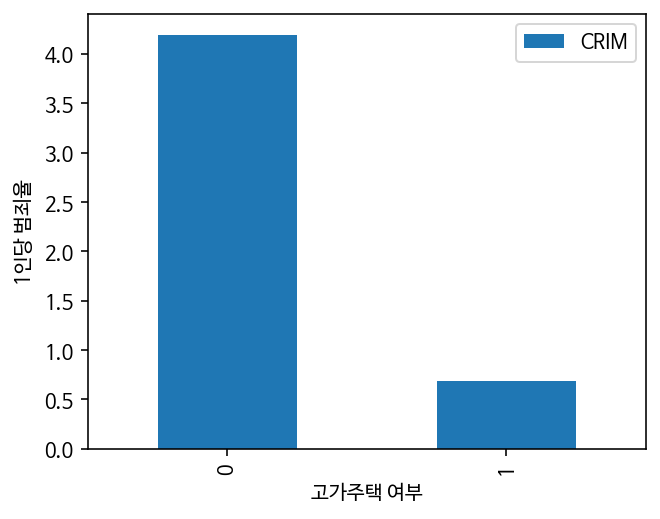

In [168]:
k3 = df.groupby("CAT. MEDV").agg(how)
k3.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="1인당 범죄율")

##### ZN

In [169]:
how = {
    "ZN" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,ZN
CAT. MEDV,
0,7.566351
1,30.440476


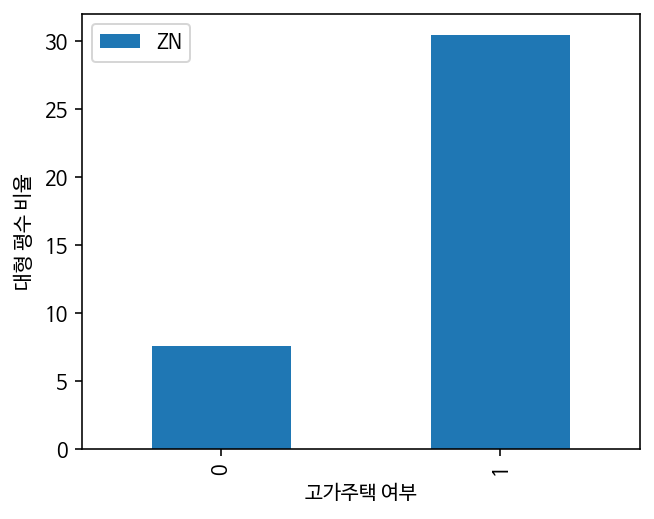

In [170]:
k2 = df.groupby("CAT. MEDV").agg(how)
k2.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="대형 평수 비율")

##### AGE


In [171]:
how = {
    "AGE" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,AGE
CAT. MEDV,
0,70.973697
1,56.523810


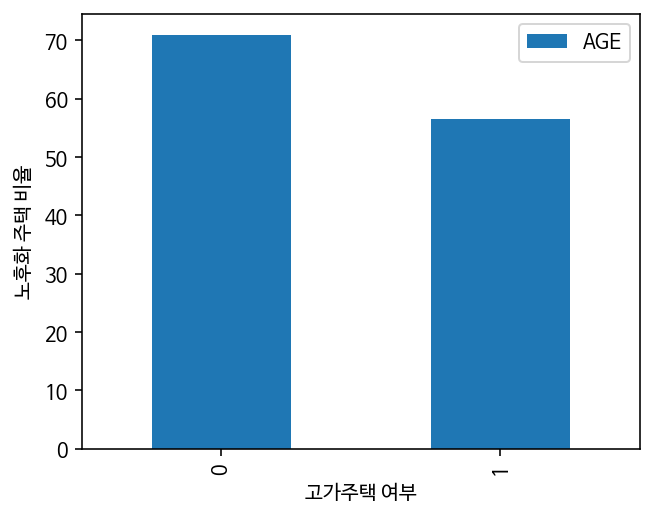

In [172]:
k2 = df.groupby("CAT. MEDV").agg(how)
k2.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="노후화 주택 비율")

##### LSTAT


In [173]:
how = {
    "LSTAT" : np.mean }
df.groupby("CAT. MEDV").agg(how)

,LSTAT
CAT. MEDV,
0,14.148720
1,5.139167


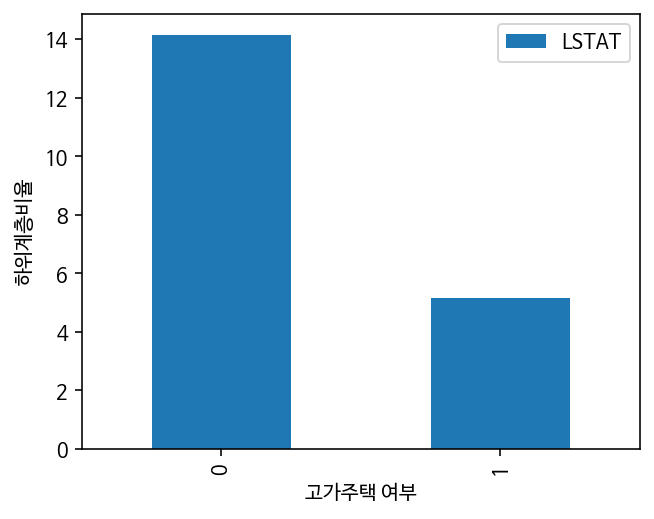

In [174]:
k2 = df.groupby("CAT. MEDV").agg(how)
k2.plot.bar(figsize=(5, 4),  xlabel="고가주택 여부", ylabel="하위계층비율")

##### INDUS & NOX


In [175]:
how = {
    "INDUS" : np.mean }
df.groupby("NOX").agg(how)

,INDUS
NOX,
0.385,1.76
0.389,2.25
0.392,3.64
0.394,3.75
0.398,3.37
...,...
0.713,18.10
0.718,18.10
0.740,18.10


In [176]:
how = {
    "NOX" : np.mean }
df.groupby("INDUS").agg(how)

,NOX
INDUS,
0.46,0.422000
0.74,0.410000
1.21,0.401000
1.22,0.403000
1.25,0.429000
...,...
18.10,0.672417
19.58,0.746867
21.89,0.624000


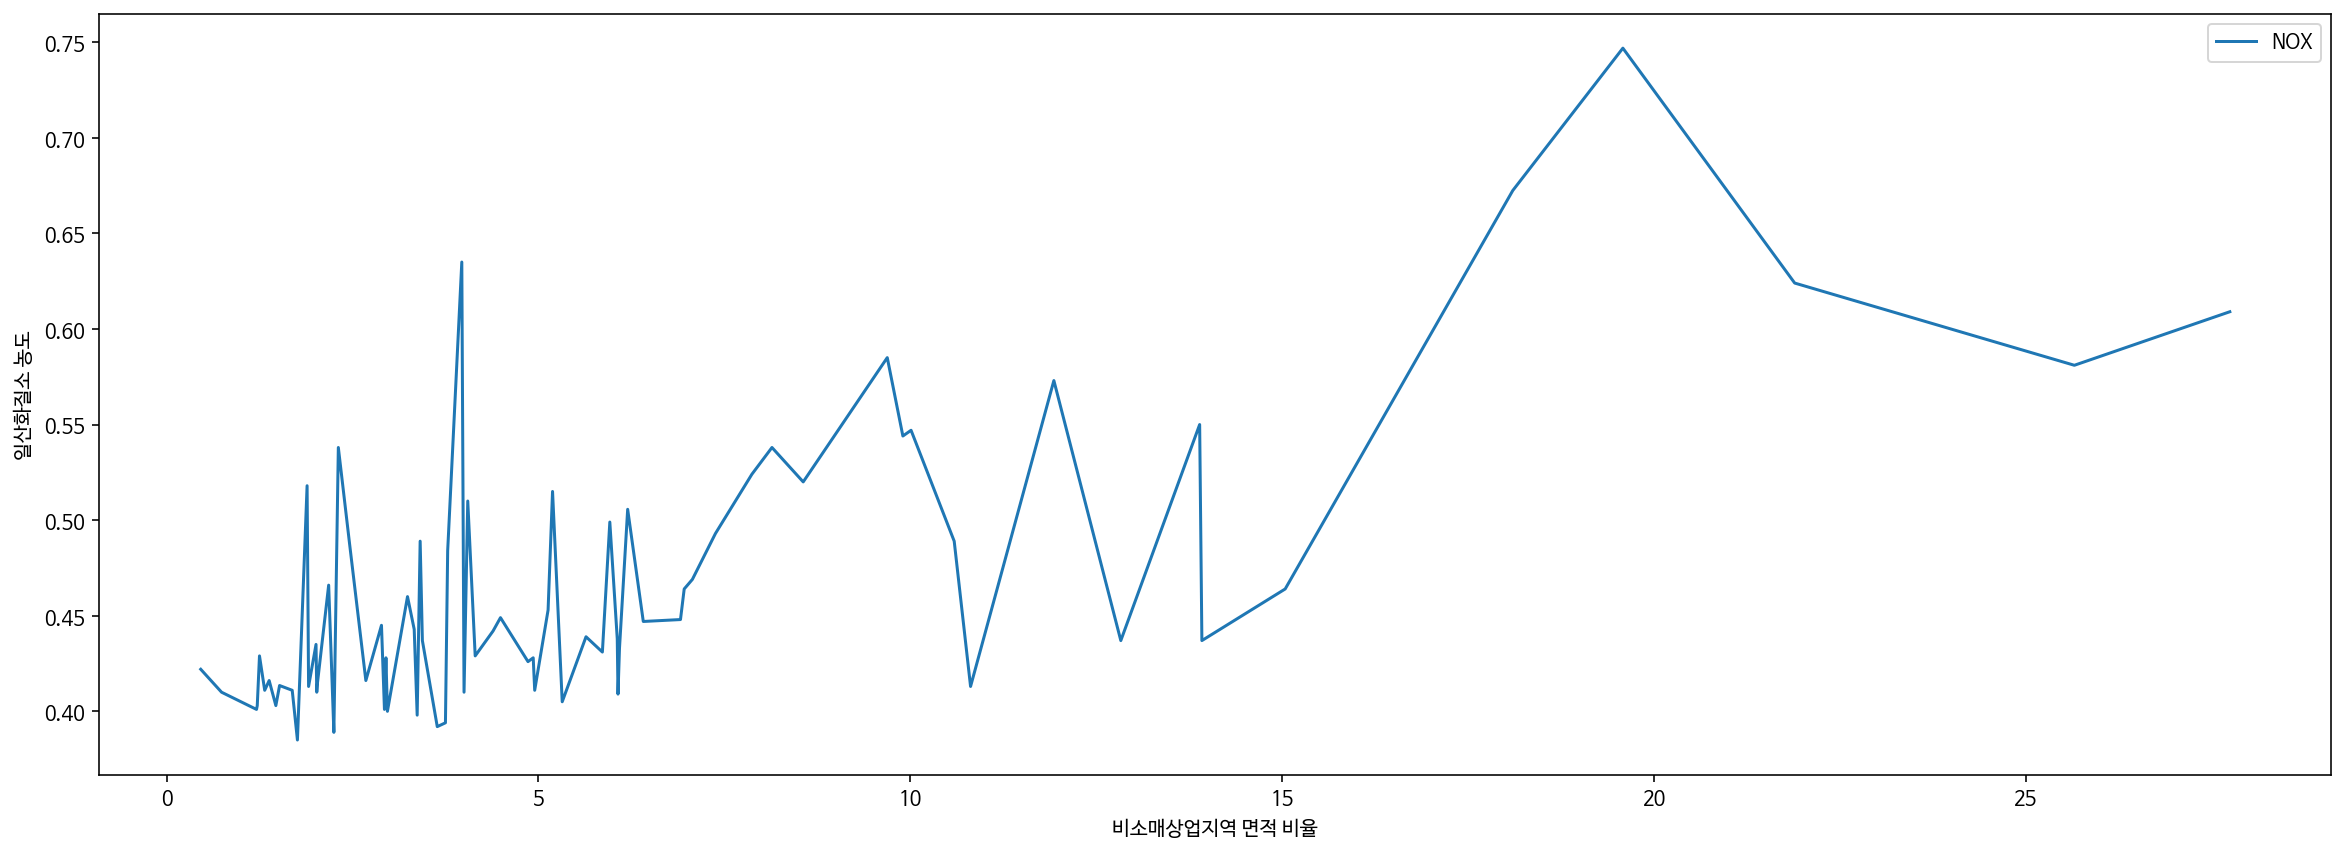

In [187]:
ind = df.groupby("INDUS").agg(how)
ind.plot.line(figsize=(20, 7), xlabel="비소매상업지역 면적 비율", ylabel="일산화질소 농도")